In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
width = 24
height = 10
plt.rcParams['figure.figsize'] = [width,height]



In [2]:
# these are parameterized over papermill
from cisclient.client import CISClient
from lcb.cisvis.spectra import generate_spectra_plot, generate_similarity_plot, to_dataframe, \
    generate_histogram_accurate_mass, generate_histogram_intensity, generate_head_tail_plot, generate_histogram_ri
cis_url = 'https://dev-api.metabolomics.us/cis'
cis_api_token = 'rDJfRW6ilG2WooOR72AaE3NqL4m23WvY6ub4FEoS'
library = "soqe[M+H][M+NH4] | QExactive | test | positive"

In [3]:

client =  CISClient(cis_url, cis_api_token)
data = []
compounds = client.get_compounds_by_type(library=library,target_type='CONFIRMED_CONSENSUS',autopage=True)

In [4]:
print("{} contains {} confirmed compounds".format(library,len(compounds)))

soqe[M+H][M+NH4] | QExactive | test | positive contains 1318 confirmed compounds


In [5]:
for splash in compounds:
    compound = client.get_compound(library=library, splash=splash)
    data.append(compound)


this plot plots all similarity scores of this library against each other

Index contains duplicate entries, cannot reshape


TypeError: 'NoneType' object is not subscriptable

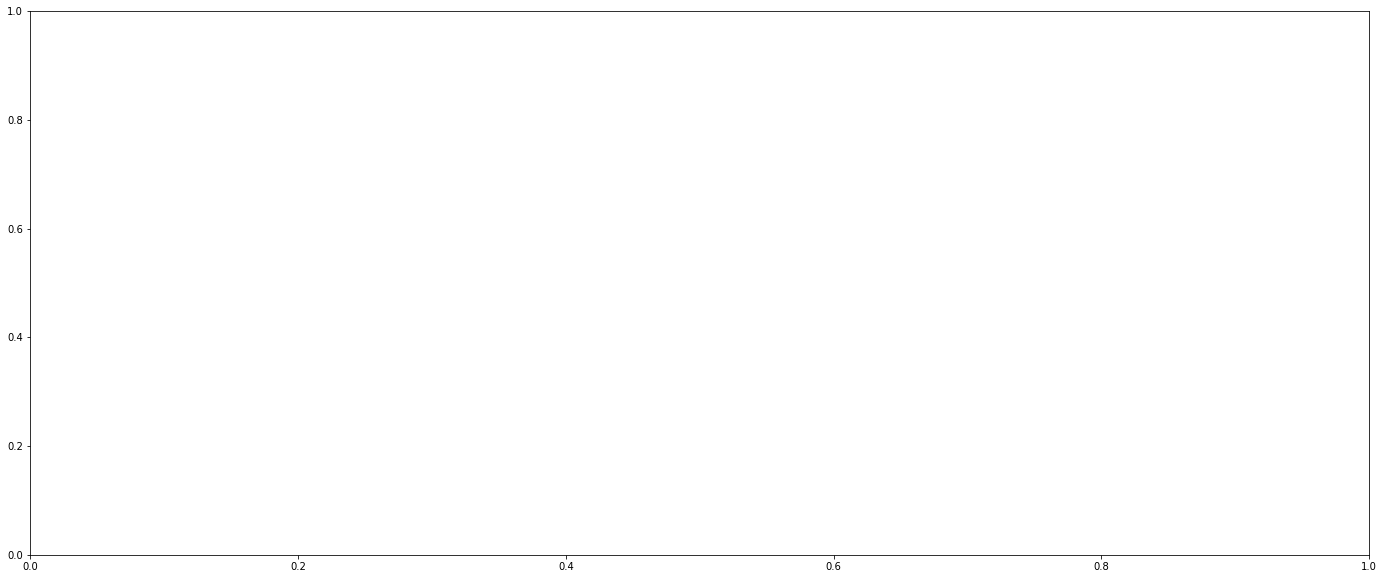

In [6]:
sim = generate_similarity_plot(data)
filtered_sim = sim[(sim['score'] > 0.7) & (sim['x (spectra id)'] != sim['y (spectra id)'])]
lib = to_dataframe(data)
lib['members'] = lib['splash'].apply(lambda x: list(map(lambda y: client.get_compound(library=library,splash=y),client.get_members(library=library,splash=x,autopage=True))))

lib_to_show = lib.drop(['accurate_mass','spectrum','method','ms_level','required_for_correction','inchi_key','target_type','splash','unique_mass','name','members'],axis=1)

the actual data matrix with all similarity > 700

this is the content of the actual library

In [ ]:
lib_to_show

This is a visualization of the contributing spectra (top) and the compound consensus (bottom)

In [ ]:
def show(compound,members):

    fig, axes = plt.subplots(1, 3)


    generate_histogram_ri(members,axes=axes[0])
    generate_histogram_accurate_mass(members,axes=axes[1])
    generate_histogram_intensity(members,axes=axes[2])

    plt.show()
    for member in members:
        generate_head_tail_plot(member=member,compound=compound,figsize=(width,height))

    mem = to_dataframe(members).drop(['accurate_mass','spectrum','method','ms_level','required_for_correction','inchi_key','target_type','splash','unique_mass','name'],axis=1)
    return mem
members = [show(compound, members) for compound, members in zip(lib['splash'].apply(lambda x: client.get_compound(library=library,splash=x)), lib['members'])]

